# Importar librerias

In [1]:
#Librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter

#Feature Selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE #Para Regresion Logistica
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Metricas de desempeño
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, average_precision_score, log_loss, matthews_corrcoef

#Dividir conjutno
from sklearn.model_selection import train_test_split

#Estandarizacion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Modelos ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout


#Optimizacion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna
from optuna.samplers import TPESampler

#Visualizacion de desempeño
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [2]:


from sklearn.model_selection import cross_val_score

import sklearn.datasets as datasets



import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


# Importar Dataset

Comenzamos leyendo el dataset con el metodo `pd.read_csv()`

In [3]:
df=pd.read_csv('Rochester.csv')
df.shape

(53601, 51)

## Acerca del dataset

Para el presente trabajo, se utliza el dataset proveido del paper *"Dataset of attacks on a live enterprise VoIP network for machine learning based intrusion detection and prevention systems"* del Rochester Institute of Technology, Dubai, United Arab Emirates.
Este dataset proporciona acceso a datos en bruto de una red VoIP empresarial gestionada por medio de Asterisk 17.0, programa de software libre que proporciona funcionalidades de una central telefónica.
Contiene registros de varios tipos de ataques que proporcionan a los investigadores una variedad de escenarios de ataque para investigar y/o entrenar modelos.


Para trabajar el dataset, es necesario utilizar una herramienta de conversion dado que los archivos vienen en formato PCAP el cual es un método para la captura, almacenamiento y análisis del tráfico de red.
Se utilizo la herramienta **3FEx: Fast Flow Feature Extractor** la cual agrupa los paquetes en flujos y los almacena en un archivo csv, extrayendo las siguientes caracteristicas

## Descripcion de las features
En la literatura de la herramienta utilizada para obtener los datos tenemos una descripcion detallada de lo que significa cada feature
| No. | Feature Name | Description |
| --- | --- | --- |
|0|proto| Protocol type|
|1|ts|Session time stamp|
|2|srcIP|IPv4 source address|
|3|srcPort| Source port|
|4|dstIP|IPv4 destination address|
|5|dstPort|Destination port|
|6|flowduration|Session duration|
|7|total_fpackets|Number of packets in the forward direction|
|8|total_bpackets|Number of packets in the backward direction|
|9|total_fpktl|Transmited bytes in forward direction|
|10|total_bpktl|Transmited bytes in backward direction|
|11|min_fpktl|Minimum packet size in forward direction|
|12|min_bpktl|Minimum packet size in backward direction|
|13|max_fpktl|Maximum packet size in forward direction|
|14| max_bpktl|Maximum packet size in backward direction|
|15|mean_fpktl|Mean packet size in forward direction|
|16| mean_bpktl|Mean packet size in backward direction|
|17|std_fpktl|Standard deviation packet size in forward direction|
|18|std_bpktl|Standard deviation packet size in backward direction|
|19|total_ﬁpt|Sum of interarrival times in forward direction|
|20|total_bipt|Sum of interarrival times in backward direction|
|21| min_ﬁpt|Minimum interarrival time in forward direction|
|22|min_bipt|Minimum interarrival time in backward direction|
|23| max_ﬁpt|Maximum interarrival time in forward direction|
|24| max_bipt|Maximum interarrival time in backward direction|
|25| mean_ﬁpt|Mean interarrival time in forward direction|
|26| mean_bipt|Mean interarrival time in backward direction|
|27|std_ﬁpt|Standard deviation packet size in forward direction|
|28|std_bipt|Standard deviation packet size in backward direction|
|29|fpsh_cnt|Number PSH ﬂags in forward direction|
|30|bpsh_cnt|Number PSH ﬂags in backward direction|
|31|furg_cnt|Number URG ﬂags in forward direction|
|32| burg_cnt|Number URG ﬂags in backward direction|
|33|total_fhlen|Sum of headers length in forward direction|
|34|total_bhlen|Sum of headers length in backward direction|
|35|fPktsPerSecond|Packets per second in forward direction|
|36|bPktsPerSecond|Packets per second in backward direction|
|37| ﬂowBytesPerSecond|Total Bytes per second in session|
|38| mean_ﬂowpktl|Average package length|
|39|std_ﬂowpktl|Standard deviation of package length|
|40| mean_ﬂowipt|Average of interarrival times|
|41|std_ﬂowipt|Standard deviation of interarrival times|
|42| ﬂow_ﬁn|Number of packets with FIN ﬂag set. Is set to signal the graceful termination of a connection.|
|43| ﬂow_syn|Number of packets with SYN ﬂag set. It is used to request the establishment of a connection|
|44| ﬂow_rst|Number of packets with RST ﬂag set. The reset flag is used to terminate a connection abruptly.|
|45| ﬂow_ack|Number of packets with ACK ﬂag set. It is set in response to a received packet with the SYN flag.|
|46| ﬂow_urg|Number of packets with URG ﬂag set. Is used to indicate that the data in the packet is urgent and should be processed immediately.|
|47| ﬂow_cwr|Number of packets with CWR ﬂag set. This flag is used to indicate that the TCP sender is reducing its congestion window.|
|48| ﬂow_ece|Number of packets with ECE ﬂag set. Is used in conjunction with the CWR flag to indicate that congestion has been encountered in the network|
|49| downUpRatio|Download and upload ratio|

## Tipos de ataques
Los ataques que el dataset recolecto y se utlizaron para el presente trabajo son los siguientes:
- **BYE attack:** "El BYE es un ataque de suplantación que envía mensajes BYE (indicando la finalización de una sesión) a un servidor SIP para terminar llamadas activas legítimas en la red VoIP.
- **INVITE flood attack:** En este tipo de ataque, se envían una gran cantidad de mensajes INVITE a un servidor con el objetivo de agotar los recursos del servidor, como la CPU y la memoria
- **REGISTER hijacking attack:** implica que un atacante se haga pasar por un usuario legítimo al reemplazar la dirección de registro de un agente de usuario (UA) con su propia dirección.
- **RTP flood attack:** En un ataque de inundación RTP, los atacantes generan y envían una gran cantidad de paquetes RTP falsificados o innecesarios a un dispositivo o servidor VoIP con el objetivo de abrumar el sistema y agotar sus recursos. Este tipo de ataque puede causar **interrupciones en la calidad del servicio, retrasos en la comunicación y**, en casos extremos, la **interrupción total del servicio de VoIP**.  
- **REGISTER flood (SIPsak):** En este tipo de ataque, los atacantes envían una gran cantidad de paquetes de registro SIP (REGISTER) al servidor SIP con el objetivo de agotar sus recursos y provocar una denegación de servicio. Esto puede causar puede causar retrasos en la entrega de paquetes, pérdida de llamadas y una degradación general en la calidad del servicio.


# EDA

Con el metodo `head()` hacemos que nos muestre los 5 primeros rasgos del Dataset

In [4]:
##Configuramos para que muestre todas las columnas
pd.set_option('display.max_columns', None)

In [5]:
df.head()

proto          ts          srcIP srcPrt          dstIP  dstPrt  \
0   UDP  1597740607   172.168.1.33   5060  192.168.1.127    5060   
1   UDP  1597740608    10.10.10.34   5060  192.168.1.127    5060   
2   UDP  1597740609    10.10.10.22   5060  192.168.1.127    5060   
3   UDP  1597740610    10.10.10.39   5060  192.168.1.127    5060   
4   UDP  1597740611  192.168.1.127   5060    10.10.10.38    5060   

   flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0    650.108593              77              11         6589         6930   
1    650.093703             107              39        26943        24782   
2    650.143833             126              54        44497        32279   
3    640.062389             101              32        23943        19712   
4    642.344584              49             118        31856        30282   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0         46        630        323        630   85.571426  630.000000   
1         46        466       1398        963  251.803741  635.435913   
2         46        464       1398        968  353.150787  597.759277   
3         46        465       1399        962  237.059402  616.000000   
4        419         46        962       1396  650.122437  256.627106   

    std_fpktl   std_bpktl  total_fipt  total_bipt  min_fipt   min_bipt  \
0   97.565421    0.000000  650.108592  600.246372  0.627411  60.015919   
1  335.784707  144.006907  650.093704  599.041023  0.000432   0.000046   
2  423.516757  134.670938  650.143837  621.701141  0.000024   0.035832   
3  335.154078  148.254794  640.062390  600.283919  0.000484   0.014410   
4  178.678441  295.940539  633.145739  642.320288  0.011040   0.000061   

    max_fipt   max_bipt  mean_fipt  mean_bipt   std_fipt   std_bipt  fpsh_cnt  \
0  10.015937  60.034237   8.554060  60.024635   3.254579   0.008026         0   
1  10.031176  60.033684   6.132959  15.764237   3.933914  21.225599         0   
2  10.029355  60.028313   5.201151  11.730210   3.938435  16.175406         0   
3  10.015551  60.035000   6.400624  19.363997   4.067693  22.302143         0   
4  60.031796  10.008867  13.190536   5.489917  17.885094   4.327397         0   

   bpsh_cnt  furg_cnt  burg_cnt  total_fhlen  total_bhlen  fPktsPerSecond  \
0         0         0         0         3971         6556        0.118442   
1         0         0         0        23305        23456        0.164592   
2         0         0         0        40213        30443        0.193803   
3         0         0         0        20509        18624        0.157797   
4         0         0         0        30190        26270        0.076283   

   bPktsPerSecond  flowBytesPerSecond  mean_flowpktl  std_flowpktl  \
0        0.016920           20.794987     153.625000    202.748886   
1        0.059991           79.565453     354.280822    341.863403   
2        0.083059          118.090790     426.533333    378.498383   
3        0.049995           68.204292     328.233083    341.605835   
4        0.183702           96.736237     372.083832    321.333252   

   mean_flowipt  std_flowipt  flow_fin  flow_syn  flow_rst  flow_ack  \
0      7.560203     4.017652         0         0         0         0   
1      5.152358     4.040393         0         0         0         0   
2      4.023469     3.894314         0         0         0         0   
3      5.060524     4.290047         0         0         0         0   
4      7.300519    10.972709         0         0         0         0   

   flow_urg  flow_cwr  flow_ece  downUpRatio  label  
0         0         0         0     1.051753      0  
1         0         0         0     0.919794      0  
2         0         0         0     0.725420      0  
3         0         0         0     0.823289      0  
4         0         0         0     0.950590      0

Con la variable `target_names` definimos los nombres de las clases

In [6]:
target_names = ['class 0', 'class 1']

Aplicamos el metodo `describe()` para conocer las estadisiticas del Dataset

In [7]:
df.describe()

dstPrt  flowduration  total_fpackets  total_bpackets  \
count  53601.000000  53601.000000    53601.000000    53601.000000   
mean   10001.931736      2.590968       38.828977       43.991381   
std    14989.389094     39.953876     1373.026188     2548.542438   
min        0.000000      0.000000        0.000000        0.000000   
25%     1148.000000      0.000000        1.000000        0.000000   
50%     4126.000000      0.000000        1.000000        0.000000   
75%     9099.000000      0.000000        1.000000        0.000000   
max    65389.000000   1218.950809   188752.000000   309705.000000   

        total_fpktl   total_bpktl     min_fpktl     min_bpktl     max_fpktl  \
count  5.360100e+04  5.360100e+04  53601.000000  53601.000000  53601.000000   
mean   1.325894e+04  1.770607e+04     63.360833      3.571295     67.560027   
std    6.801492e+05  1.506707e+06     49.760344     28.007474     76.782501   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    5.800000e+01  0.000000e+00     58.000000      0.000000     58.000000   
50%    5.800000e+01  0.000000e+00     58.000000      0.000000     58.000000   
75%    5.800000e+01  0.000000e+00     58.000000      0.000000     58.000000   
max    7.149178e+07  1.957336e+08   1272.000000    632.000000   2946.000000   

          max_bpktl    mean_fpktl    mean_bpktl     std_fpktl     std_bpktl  \
count  53601.000000  53601.000000  53601.000000  53601.000000  53601.000000   
mean       6.798623     64.838586      4.818799      1.186191      0.961187   
std       61.210230     51.950054     36.301381     15.332718     14.137426   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000     58.000000      0.000000      0.000000      0.000000   
50%        0.000000     58.000000      0.000000      0.000000      0.000000   
75%        0.000000     58.000000      0.000000      0.000000      0.000000   
max     1399.000000   1272.000000    661.965820    514.821206    477.811894   

         total_fipt    total_bipt      min_fipt      min_bipt      max_fipt  \
count  53601.000000  53601.000000  53601.000000  53601.000000  53601.000000   
mean       2.532117      2.345867      0.008548      0.007526      0.092859   
std       39.607387     37.141284      0.535939      0.580640      1.861573   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     1218.950808   1193.823629     55.356758     60.015919     98.175636   

           max_bipt     mean_fipt     mean_bipt      std_fipt      std_bipt  \
count  53601.000000  53601.000000  53601.000000  53601.000000  53601.000000   
mean       0.166691      0.036875      0.052249      0.023698      0.051967   
std        3.522492      0.777734      1.109001      0.500364      1.099926   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      347.274963     67.291229     67.291229     51.929943     82.649437   

           fpsh_cnt      bpsh_cnt  furg_cnt      burg_cnt   total_fhlen  \
count  53601.000000  53601.000000   53601.0  53601.000000  5.360100e+04   
mean       0.577060      0.572116       0.0      0.001978  1.190353e+04   
std      129.791966    129.886700       0.0      0.323743  6.394401e+05   
min        0.000000      0.000000       0.0      0.000000  0.000000e+00   
25%        0.000000      0.000000       0.0      0.000000  2.400000e+01   
50%        0.000000      0.000000       0.0      0.000000  2.400000e+01   
75%        0.00000

El método `info()` muestra el resumen del dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53601 entries, 0 to 53600
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   proto               53601 non-null  object 
 1   ts                  53601 non-null  object 
 2   srcIP               53601 non-null  object 
 3   srcPrt              53601 non-null  object 
 4   dstIP               53601 non-null  object 
 5   dstPrt              53601 non-null  int64  
 6   flowduration        53601 non-null  float64
 7   total_fpackets      53601 non-null  int64  
 8   total_bpackets      53601 non-null  int64  
 9   total_fpktl         53601 non-null  int64  
 10  total_bpktl         53601 non-null  int64  
 11  min_fpktl           53601 non-null  int64  
 12  min_bpktl           53601 non-null  int64  
 13  max_fpktl           53601 non-null  int64  
 14  max_bpktl           53601 non-null  int64  
 15  mean_fpktl          53601 non-null  float64
 16  mean

Observamos que en el Dataset no existen objetos nulos/NaN, y en su mayoria esta compuesto por variables int y float.
Para este caso, se eliminan las columnas referentes al Protocolo, direcciones IP y numeros de Puerto para que los modelos puedan aprender de la demas informacion.

In [9]:
df.drop(['proto','ts','srcIP','srcPrt','dstIP','dstPrt'],axis=1,inplace=True)

Aplicamos la funcion `shape` para conocer las dimensiones del dataset

In [10]:
df.shape

(53601, 45)

Con `Counter` obtenemos la cantidad de observaciones de clase positiva y clase negativa. Inicialmente, observamos que el dataset esta muy desbalanceado con una proporcion de aprox 72:1

In [11]:
collections.Counter(df.label.values)

Counter({1: 52866, 0: 735})

Revisamos por medio de `duplicated().sum()` la cantidad de observaciones duplicadas

In [12]:
df.duplicated().sum()

51865

Eliminamos dichas observaciones duplicadas para no exponernos a **Data Leak**

In [13]:
# Eliminar duplicados
df = df.drop_duplicates()

Validamos por medio de `isnull().values.sum()` que no existan valores nulos y, en caso de existir, eliminamos la observacion con `dropna(inplace=True)`.

In [14]:
print("Valores nulos: ", df.isnull().values.sum())
df.dropna(inplace=True)

Valores nulos:  1


Validamos nuevamente con `shape` y `Counter` la dimension resultante de nuestro dataset.

In [15]:
print("Total de datos; ",df.shape, "de los cuales ",collections.Counter(df.label.values))

Total de datos;  (1735, 45) de los cuales  Counter({1: 1013, 0: 722})


In [16]:
df.describe(include='all').T

count           mean           std   min          25%  \
flowduration        1735.0      80.044024  2.077033e+02   0.0     0.001899   
total_fpackets      1735.0    1169.686455  7.546616e+03   1.0     2.000000   
total_bpackets      1735.0    1358.929683  1.410611e+04   0.0     1.000000   
total_fpktl         1735.0  407742.668012  3.760145e+06  42.0   112.000000   
total_bpktl         1735.0  547009.235159  8.359656e+06   0.0    58.000000   
min_fpktl           1735.0      79.206340  8.989617e+01  42.0    54.000000   
min_bpktl           1735.0     109.310086  1.123185e+02   0.0    58.000000   
max_fpktl           1735.0     208.931412  3.055720e+02  42.0    62.000000   
max_bpktl           1735.0     209.014986  2.710360e+02   0.0    58.000000   
mean_fpktl          1735.0     124.857673  1.072402e+02  42.0    62.000000   
mean_bpktl          1735.0     147.973736  1.395926e+02   0.0    58.000000   
std_fpktl           1735.0      36.642876  7.724630e+01   0.0     2.494328   
std_bpktl           1735.0      29.694860  7.296839e+01   0.0     0.000000   
total_fipt          1735.0      78.227104  2.063176e+02   0.0     0.000982   
total_bipt          1735.0      72.473080  1.937936e+02   0.0     0.000000   
min_fipt            1735.0       0.264094  2.968352e+00   0.0     0.000009   
min_bipt            1735.0       0.232514  3.220114e+00   0.0     0.000000   
max_fipt            1735.0       2.868792  9.957565e+00   0.0     0.000976   
max_bipt            1735.0       5.149738  1.891741e+01   0.0     0.000000   
mean_fipt           1735.0       1.139200  4.176214e+00   0.0     0.000909   
mean_bipt           1735.0       1.614167  5.957725e+00   0.0     0.000000   
std_fipt            1735.0       0.732137  2.687023e+00   0.0     0.000000   
std_bipt            1735.0       1.605470  5.907787e+00   0.0     0.000000   
fpsh_cnt            1735.0      17.827666  7.214019e+02   0.0     0.000000   
bpsh_cnt            1735.0      17.674928  7.219324e+02   0.0     0.000000   
furg_cnt            1735.0       0.000000  0.000000e+00   0.0     0.000000   
burg_cnt            1735.0       0.000000  0.000000e+00   0.0     0.000000   
total_fhlen         1735.0  366885.104899  3.536775e+06   8.0    44.000000   
total_bhlen         1735.0  499686.395965  7.884469e+06   0.0    24.000000   
fPktsPerSecond      1735.0    1563.194419  8.045053e+03   0.0     8.560353   
bPktsPerSecond      1735.0    1320.857207  7.997425e+03   0.0     5.320965   
flowBytesPerSecond  1735.0  222020.688311  9.874990e+05   0.0  2613.807007   
mean_flowpktl       1735.0     134.005209  1.023049e+02  42.0    61.600000   
std_flowpktl        1735.0      52.014306  8.533509e+01   0.0     2.309401   
mean_flowipt        1735.0       0.737446  2.146979e+00   0.0     0.001043   
std_flowipt         1735.0       0.767369  2.660412e+00   0.0     0.000414   
flow_fin            1735.0       0.153314  6.422362e-01   0.0     0.000000   
flow_syn            1735.0       0.735447  9.616553e-01   0.0     0.000000   
flow_rst            1735.0       0.408069  6.202499e-01   0.0     0.000000   
flow_ack            1735.0      71.360807  2.042339e+03   0.0     0.000000   
flow_urg            1735.0       0.000000  0.000000e+00   0.0     0.000000   
flow_cwr            1735.0       0.008069  2.920388e-01   0.0     0.000000   
flow_ece            1735.0       0.000000  0.000000e+00   0.0     0.000000   
downUpRatio         1735.0       1.214581  3.794186e+00   0.0     0.517857   
label               1735.0       0.583862  4.930592e-01   0.0     0.000000   

                             50%            75%           max  
flowduration            0.010463      60.750316  1.218951e+03  
total_fpackets          2.000000      31.000000  1.887520e+05  
total_bpackets          2.000000      26.500000  3.097050e+05  
total_fpktl           181.000000    5114.000000  7.149178e+07  
total_bpktl           359.000000    3598.000000  1.957336e+08  
min_fpktl              62.000000      66.000000 

# Preprocesamiento de los datos

## Feature selection

`Feature selection` es un paso importante en el preprocesamiento de datos y en la ingeniería de características.
 - Hace referencia a la identificación y selección de las características más importantes para el problema que se está abordando.
 - Mejoramos el coste de cálculo necesario, reducimos la complejidad del modelo y mejoramos la precisión del modelo.

### Correlacion de Pearson

Comenzamos observando la matriz del coeficiente de correlación de Pearson

In [17]:
#correlation_matrix = df.drop('label', axis=1).corr()
correlation_matrix = df.corr()
# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Mapa de calor de correlación entre características')
plt.show()

Observamos inconsistencas en las features ademas de alta correlacion en varias de ellas.
Para reducirlo, se aplicaran tecnicas de Feature Engineering,

### VarianceThreshold

- `VarianceThreshold` selecciona solo las features cuya varianza supera un cierto umbral., en este caso *0.05*, lo que equivale a decir que el 95% de los valores en la columna son similares.
    - La idea detrás de este enfoque es que, si la varianza de una variable es pequeña, las probabilidades de que el valor contenido en ella sea el mismo -o muy parecido- son elevadas, por lo que aportará poco al algoritmo.

Para trabajarlo, creamos una copia del dataset, sin tomar encuenta la columna de la clase

In [18]:
X=df.copy()
X.drop(['label'],axis=1,inplace=True)

In [19]:
#Generamos el objeto de clase VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.05)
# Lo entrenamos con el dataset
var_thr.fit(X)
# Como resultado obtenemos el siguiente arreglo
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True])

In [20]:
# Imprimimos las features que no cumplen con el umbral
concol = [column for column in X.columns
          if column not in X.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg
flow_ece


In [21]:
# Eliminamos dichas features
df.drop(concol,axis=1,inplace=True)

Al aplicar el umbral de 5%, fueron seleccionadas y eliminadas 4 caracteristicas

In [22]:
# Imprimimos la dimension final del dataset
df.shape

(1735, 41)

In [23]:
#Calcular la matriz de correlación
#correlation_matrix = df.drop('label', axis=1).corr()
correlation_matrix = df.corr()
# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Mapa de calor de correlación entre características')
plt.show()

Pese a que se corriguieron algunas inconsistencias, se sigue observando que existe alta correlacion en varias de sus caracteristicas. Por lo que procedemos a utilizar otra tecnica de Feature Engineering

### VIF

`Variance Inflation Factor` es una medida utilizada en análisis de regresión para detectar la multicolinealidad entre variables predictoras.
| Valor de VIF | Grado de Muticolinealidad|
| --- | --- |
|Hasta 5|	Débil/Moderado|
|De 5 a 10|	Elevado|
|Mayor a 10|	Muy elevado|

Un VIF alto, indica que la variable correspondiente está altamente correlacionada con otras variables predictoras y puede ser problemática para el modelo.

In [24]:
#Hacemos una copia de nuestro dataset
X=df.copy()
X.drop(['label'],axis=1,inplace=True)

In [25]:
# Conjunto de variables predictora

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

print(vif_data)

               feature           VIF
0         flowduration  2.119684e+02
1       total_fpackets  8.933615e+06
2       total_bpackets  3.501040e+07
3          total_fpktl  1.895285e+09
4          total_bpktl  1.058361e+10
5            min_fpktl  7.905705e+01
6            min_bpktl  1.722371e+02
7            max_fpktl  1.268621e+02
8            max_bpktl  7.745362e+01
9           mean_fpktl  1.986927e+02
10          mean_bpktl  1.964108e+02
11           std_fpktl  9.435223e+01
12           std_bpktl  6.870340e+01
13          total_fipt  1.609442e+02
14          total_bipt  4.344404e+01
15            min_fipt  8.465075e+01
16            min_bipt  1.261852e+01
17            max_fipt  8.885907e+00
18            max_bipt  2.051678e+01
19           mean_fipt  2.120317e+02
20           mean_bipt  3.208317e+01
21            std_fipt  5.019206e+01
22            std_bipt  5.076083e+01
23            fpsh_cnt  2.991952e+06
24            bpsh_cnt  6.990643e+06
25         total_fhlen  1.675020e+09
2

Encontramos que en el conjunto se encuentran features altamente relacionadas, para corregirlo, se utilizaran los metodos de Recursive **Feature Elimination** y **Feature Importance** durante la generacion de los modelos de Regresion Logistica y Arbol de Decision. 


# Creando conjunto de entrenamiento

## Split
La funcion `train_test_split` nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo

In [26]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.3, random_state=42)

In [27]:
#Original dataset dimensions
X_train.shape, X_test.shape

((1214, 40), (521, 40))

## Estandarizacion de variables numericas

**Estandarizar las variables** significa ajustar sus valores para que tengan una media de cero y una desviación estándar de uno, o un rango similar.

In [28]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(X_train)
X_train_stand = preprocessor.transform(X_train)
X_test_stand  = preprocessor.transform(X_test)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

## Regenerando el dataset

In [29]:
labels=list(X_train.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [30]:
df_X_train_stand

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0         1.087551       -0.158497       -0.098760    -0.104787    -0.061336   
1        -0.396034       -0.165226       -0.099843    -0.108095    -0.062658   
2        -0.396031       -0.165379       -0.099843    -0.108100    -0.062624   
3        -0.396043       -0.165532       -0.099926    -0.108139    -0.062667   
4        -0.387418       -0.165226       -0.099760    -0.108096    -0.062652   
...            ...             ...             ...          ...          ...   
1209     -0.396029       -0.165226       -0.099843    -0.108094    -0.062658   
1210     -0.396043       -0.165532       -0.099926    -0.108139    -0.062667   
1211     -0.395993       -0.165532       -0.099926    -0.108137    -0.062665   
1212     -0.396037       -0.165226       -0.099843    -0.108092    -0.062658   
1213     -0.396029       -0.165226       -0.099843    -0.108098    -0.062658   

      min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0     -0.399690   3.090055   4.032972   2.251868    1.015491    3.432964   
1     -0.302635  -0.501425  -0.447367  -0.529131   -0.591153   -0.639050   
2      0.061319   0.549740  -0.376197  -0.079486   -0.354350    0.212652   
3     -0.302635  -0.501425  -0.515149  -0.574474   -0.702205   -0.681813   
4     -0.205581  -0.501425  -0.474480  -0.574474   -0.597685   -0.681813   
...         ...        ...        ...        ...         ...         ...   
1209  -0.302635  -0.501425  -0.447367  -0.529131   -0.578088   -0.639050   
1210  -0.302635  -0.501425  -0.515149  -0.574474   -0.702205   -0.681813   
1211  -0.205581  -0.326231  -0.488036  -0.498903   -0.623815   -0.539269   
1212  -0.302635  -0.501425  -0.440589  -0.529131   -0.565023   -0.639050   
1213  -0.302635  -0.501425  -0.447367  -0.529131   -0.623815   -0.639050   

      std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0      3.764532   1.314514    1.106910    1.033178 -0.080198 -0.036762   
1     -0.336954  -0.275706   -0.388383   -0.384648 -0.080379 -0.068287   
2     -0.369130  -0.285881   -0.388377   -0.384646 -0.079513 -0.068141   
3     -0.469840  -0.397800   -0.388388   -0.384652 -0.080389 -0.068549   
4     -0.439939  -0.397800   -0.379695   -0.375385  0.258738  0.219856   
...         ...        ...         ...         ...       ...       ...   
1209  -0.327218  -0.275706   -0.388383   -0.384642 -0.080375 -0.067941   
1210  -0.469840  -0.397800   -0.388388   -0.384652 -0.080389 -0.068549   
1211  -0.469840  -0.397800   -0.388388   -0.384652 -0.080389 -0.068549   
1212  -0.312323  -0.275706   -0.388384   -0.384647 -0.080375 -0.068223   
1213  -0.332813  -0.275706   -0.388379   -0.384647 -0.080381 -0.068223   

      max_fipt  max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0     0.769090  2.688903   1.446262   3.042975  1.168466  3.720584 -0.140596   
1    -0.287925 -0.261319  -0.278485  -0.270232 -0.283653 -0.269202  0.127353   
2    -0.287803 -0.261296  -0.278050  -0.270156 -0.283971 -0.269202 -0.140596   
3    -0.288048 -0.261359  -0.278635  -0.270367 -0.283971 -0.269202 -0.140596   
4    -0.189529 -0.215489  -0.047999  -0.118776 -0.274748 -0.265358 -0.140596   
...        ...       ...        ...        ...       ...       ...       ...   
1209 -0.287936 -0.261266  -0.278497  -0.270053 -0.283686 -0.269202  0.127353   
1210 -0.288048 -0.261359  -0.278635  -0.270367 -0.283971 -0.269202 -0.140596   
1211 -0.288048 -0.261359  -0.278635  -0.270367 -0.283971 -0.269202 -0.140596   
1212 -0.287947 -0.261309  -0.278509  -0.270199 -0.283713 -0.269202  0.127353   
1213 -0.287853 -0.261309  -0.278400  -0.270199 -0.283462 -0.269202  0.127353   

      bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0    -0.029099    -0.099744    -0.058771       -0.207441       -0.170306   
1    -0.029099    -0.102770    -0.060106        0.041517       -0.002760   
2    -0.029099    -0.102760    -0.060070       -0.0807

In [31]:
df_X_test_stand

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0       -0.395994       -0.165532       -0.099926    -0.108137    -0.062665   
1        1.000505        2.101422        0.446036     0.881892     0.135505   
2       -0.396030       -0.165379       -0.099843    -0.108100    -0.062624   
3        0.223622       -0.159568       -0.095844    -0.105910    -0.061919   
4       -0.396035       -0.165379       -0.099843    -0.108100    -0.062624   
..            ...             ...             ...          ...          ...   
516      0.364889        1.068417        0.509345     0.429956     0.158469   
517     -0.394939       -0.165379       -0.099926    -0.108122    -0.062667   
518     -0.396043       -0.165532       -0.099926    -0.108138    -0.062667   
519      0.365906        1.041196        0.468361     0.417023     0.143545   
520     -0.396038       -0.165379       -0.099926    -0.108121    -0.062667   

     min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0    -0.205581  -0.326231  -0.488036  -0.498903   -0.623815   -0.539269   
1    -0.254108  -0.396308   0.027101   0.030091    0.861782    0.457723   
2     0.073450   0.558500  -0.372808  -0.075708   -0.344551    0.219779   
3    -0.205581  -0.396308   0.081326  -0.241963    0.528515   -0.303786   
4     0.061319   0.549740  -0.376197  -0.079486   -0.354350    0.212652   
..         ...        ...        ...        ...         ...         ...   
516  -0.254108  -0.466386   0.027101   0.030091    0.858593    0.457630   
517  -0.302635  -0.501425  -0.515149  -0.574474   -0.702205   -0.681813   
518  -0.254108  -0.501425  -0.501592  -0.574474   -0.663010   -0.681813   
519  -0.254108  -0.466386   0.027101   0.030091    0.854367    0.457260   
520  -0.302635  -0.466386  -0.501592  -0.559360   -0.682608   -0.653304   

     std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0    -0.469840  -0.397800   -0.388388   -0.384652 -0.080389 -0.068549   
1    -0.369193  -0.341987    1.019181    0.308865 -0.080385 -0.068543   
2    -0.369130  -0.285881   -0.388377   -0.384646 -0.079484 -0.068161   
3     0.539678   0.122585    0.236167    0.275786 -0.061519 -0.068549   
4    -0.369130  -0.285881   -0.388382   -0.384649 -0.079854 -0.068368   
..         ...        ...         ...         ...       ...       ...   
516  -0.333564  -0.337640    0.378549    0.382210 -0.080388 -0.068547   
517  -0.469840  -0.397800   -0.387276   -0.384652  0.007999 -0.068549   
518  -0.469840  -0.397800   -0.388388   -0.384652 -0.080389 -0.068549   
519  -0.297459  -0.328913    0.379574    0.383511 -0.080385 -0.068549   
520  -0.433218  -0.397800   -0.388384   -0.384652 -0.080014 -0.068549   

     max_fipt  max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0   -0.288048 -0.261359  -0.278635  -0.270367 -0.283971 -0.269202 -0.140596   
1   -0.223245 -0.092302  -0.273596  -0.266905 -0.279218 -0.261191 -0.140596   
2   -0.287794 -0.261299  -0.278030  -0.270167 -0.283971 -0.269202 -0.140596   
3    0.350743 -0.015566   0.571131   0.170600  0.632173  0.127654 -0.140596   
4   -0.287898 -0.261331  -0.278277  -0.270274 -0.283971 -0.269202 -0.140596   
..        ...       ...        ...        ...       ...       ...       ...   
516 -0.216376 -0.039698  -0.273591  -0.266937 -0.278490 -0.260449 -0.140596   
517 -0.263280 -0.261359  -0.219607  -0.270367 -0.283971 -0.269202 -0.140596   
518 -0.288048 -0.261359  -0.278635  -0.270367 -0.283971 -0.269202 -0.140596   
519 -0.030470  0.158320  -0.273471  -0.266683 -0.270880 -0.248194 -0.140596   
520 -0.287943 -0.261359  -0.278384  -0.270367 -0.283971 -0.269202 -0.140596   

     bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0   -0.029099    -0.102787    -0.060108       -0.191835       -0.154535   
1   -0.029099     0.782827     0.116646       -0.199264       -0.166653   
2   -0.029099    -0.102759    -0.060070       -0.086349       -0.048055   
3   -0.029099    -0.100860   

# Modelos Machine Learning

## Regresion logistica

### RandomizedSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.04 min.
tuned hpyerparameters :(best parameters)  {'penalty': 'l2', 'C': 0.6951927961775606}
Score: 0.9530626126585723
              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95       217
     class 1       0.97      0.96      0.96       304

    accuracy                           0.96       521
   macro avg       0.96      0.96      0.96       521
weighted avg       0.96      0.96      0.96       521



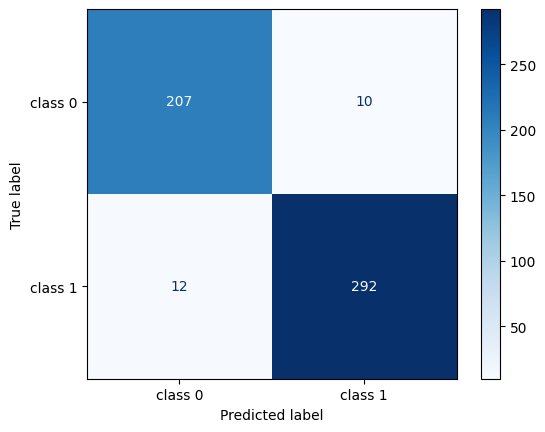

In [32]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters={'C':np.logspace(-3,3,20), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
rlrs=RandomizedSearchCV(LogisticRegression(class_weight='balanced', solver='saga'), 
                          parameters,cv=5, n_jobs=-1, verbose=3, random_state=42)
# fit on the trainning dataset
rlrs.fit(df_X_train_stand,y_train)
tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)
print("tuned hpyerparameters :(best parameters) ",rlrs.best_params_)
print("Score:",rlrs.best_score_)
y_predrlrs = rlrs.predict(df_X_test_stand)
#performance results
print(classification_report(y_test, y_predrlrs, target_names=target_names))

cm = confusion_matrix(y_test, y_predrlrs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [33]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predrlrs))

El coeficiente de correlacion de Matthews es de  0.9132673754025219


### Grid Search and Recursive Feature Elimination

In [34]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
estimator = LogisticRegression(class_weight='balanced', solver='saga')

# Inicializar el selector RFE
selector = RFE(estimator)

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'estimator__C': np.logspace(-3, 3, 10),  # Hiperparámetro de regularización para la regresión logística
    'estimator__penalty': ["l1", "l2"],  # Tipo de penalización para la regresión logística
    'n_features_to_select': [3, 5, 10,15,20,25,30,35,40,45]  # Prueba con diferentes números de características seleccionadas
}

# Inicializar Randomized Search con Cross Validation
rlgs = GridSearchCV(selector, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
rlgs.fit(df_X_train_stand,y_train)

# Obtener el mejor modelo
best_model = rlgs.best_estimator_


tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Elapsed time: 1.35 min.


In [35]:
# Seleccionar las características en los conjuntos de entrenamiento y prueba utilizando el mejor modelo
X_train_selected = best_model.transform(df_X_train_stand)
X_test_selected  = best_model.transform(df_X_test_stand)

X_train_selected=pd.DataFrame(X_train_selected)
X_test_selected=pd.DataFrame(X_test_selected)

X_train_selected.head()


0         1         2         3         4         5         6  \
0 -0.399690  3.090055  2.251868  1.015491  1.033178  3.042975  1.938868   
1 -0.302635 -0.501425 -0.529131 -0.591153 -0.384648 -0.270232 -0.723115   
2  0.061319  0.549740 -0.079486 -0.354350 -0.384646 -0.270156 -0.002443   
3 -0.302635 -0.501425 -0.574474 -0.702205 -0.384652 -0.270367 -0.816105   
4 -0.205581 -0.501425 -0.574474 -0.597685 -0.375385 -0.118776 -0.762197   

          7         8         9  
0  3.402196 -0.747294 -0.657506  
1 -0.499779  1.323974  0.958308  
2  0.015864 -0.747294 -0.657506  
3 -0.605396  0.288340  0.958308  
4 -0.533926  2.359608  4.189936

In [36]:
# Recuperar los nombres de las características originales
feature_names = df_X_train_stand.columns

# Recuperar los índices de las características seleccionadas
selected_feature_indices = [i for i, selected in enumerate(best_model.support_) if selected]

# Recuperar los nombres de las características seleccionadas
selected_feature_names = feature_names[selected_feature_indices]


In [37]:
X_train_selected=X_train_selected.set_axis(selected_feature_names, axis=1)
X_test_selected=X_test_selected.set_axis(selected_feature_names,axis=1)

#### VIF RFE 

Revisamos la multicolinealidad de nuestras features seleccionadas por el metodo RFE

In [38]:
# VIF dataframe
vif_datarfe = pd.DataFrame()
vif_datarfe["feature"] = X_train_selected.columns

# calcular VIF de cada característica
vif_datarfe["VIF"] = [variance_inflation_factor(X_train_selected.values, i)
    for i in range(len(X_train_selected.columns))]

print(vif_datarfe)

         feature        VIF
0      min_fpktl   3.984505
1      min_bpktl   4.659432
2      max_bpktl   7.204692
3     mean_fpktl  14.873354
4     total_bipt   3.333105
5      mean_bipt   2.319103
6  mean_flowpktl  14.607638
7   std_flowpktl   7.819623
8       flow_syn   2.408557
9       flow_rst   2.284226


Observamos que se encuentran elevadas las features mean_fpktl y mean_flowpktl, procedemos a eliminar una de ellas para comprobar la multicolinealidad nuevamente

In [39]:
X_train_rfeprueba=X_train_selected.drop(['mean_flowpktl','max_bpktl'],axis=1) 

# VIF dataframe
vif_datarfe = pd.DataFrame()
vif_datarfe["feature"] = X_train_rfeprueba.columns

# calcular VIF de cada característica
vif_datarfe["VIF"] = [variance_inflation_factor(X_train_rfeprueba.values, i)
    for i in range(len(X_train_rfeprueba.columns))]

print(vif_datarfe)

        feature       VIF
0     min_fpktl  3.723318
1     min_bpktl  2.787328
2    mean_fpktl  4.881527
3    total_bipt  3.178258
4     mean_bipt  2.298589
5  std_flowpktl  2.912660
6      flow_syn  2.304276
7      flow_rst  2.175425


Al eliminar las columnas de **mean_fpktl** y **std_flowpktl** se redujo la multicolinealidad a niveles aceptables <5, aplicamos los cambios al conjunto de entrenamiento y testing 

In [40]:
X_train_rfe=X_train_selected.drop(['mean_fpktl','std_flowpktl'],axis=1) 
X_test_rfe=X_test_selected.drop(['mean_fpktl','std_flowpktl'],axis=1) 
X_train_rfe.shape

(1214, 8)

In [41]:
X_train_rfe.head()

min_fpktl  min_bpktl  max_bpktl  total_bipt  mean_bipt  mean_flowpktl  \
0  -0.399690   3.090055   2.251868    1.033178   3.042975       1.938868   
1  -0.302635  -0.501425  -0.529131   -0.384648  -0.270232      -0.723115   
2   0.061319   0.549740  -0.079486   -0.384646  -0.270156      -0.002443   
3  -0.302635  -0.501425  -0.574474   -0.384652  -0.270367      -0.816105   
4  -0.205581  -0.501425  -0.574474   -0.375385  -0.118776      -0.762197   

   flow_syn  flow_rst  
0 -0.747294 -0.657506  
1  1.323974  0.958308  
2 -0.747294 -0.657506  
3  0.288340  0.958308  
4  2.359608  4.189936

#### Entrenando modelo con RFE

In [42]:
start=perf_counter()

# Entrenar el modelo de regresión logística con las características seleccionadas y los hiperparámetros óptimos
model = LogisticRegression(C=rlgs.best_params_['estimator__C'], penalty=rlgs.best_params_['estimator__penalty'],
                           class_weight='balanced', solver='saga', max_iter=1500)
model.fit(X_train_rfe, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Predecir y evaluar el modelo
y_predrlgs = model.predict(X_test_rfe)
accuracy = roc_auc_score(y_test, y_predrlgs)
print("Best Parameters:", rlgs.best_params_)
print("Score:", rlgs.best_score_)

Elapsed time: 0.00 min.
Best Parameters: {'estimator__C': 2.154434690031882, 'estimator__penalty': 'l1', 'n_features_to_select': 10}
Score: 0.959653776825494


              precision    recall  f1-score   support

     class 0       0.95      0.96      0.96       217
     class 1       0.97      0.97      0.97       304

    accuracy                           0.96       521
   macro avg       0.96      0.96      0.96       521
weighted avg       0.96      0.96      0.96       521



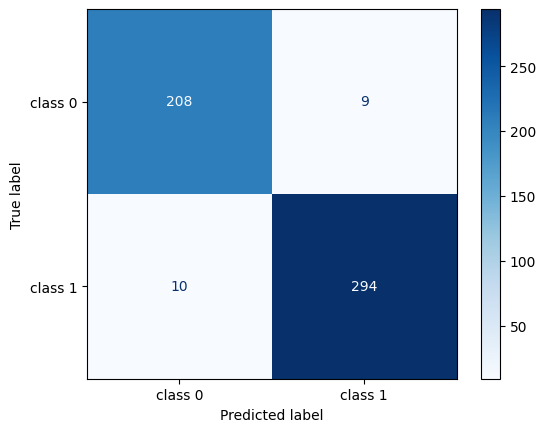

In [43]:
#performance results
print(classification_report(y_test, y_predrlgs, target_names=target_names))

cm = confusion_matrix(y_test, y_predrlgs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [44]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predrlgs))

El coeficiente de correlacion de Matthews es de  0.9250278431661353


### RL con Optuna sin RFE

In [45]:
start=perf_counter()
# Define la función objetivo
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform("C", 1e-2, 1000)

    # Crea el modelo con los hiperparámetros sugeridos
    rlo = LogisticRegression(penalty=penalty, C=C, solver='saga',random_state=42)

    # Entrena el modelo
    rlo.fit(df_X_train_stand,y_train)

    # Predice en el conjunto de prueba
    y_predrlo = rlo.predict(df_X_test_stand)

    # Calcula la métrica de rendimiento (recall)
    lloss = log_loss(y_test, y_predrlo)

    return lloss


In [46]:
# Crea el estudio de optimización
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(objective, n_trials=300)

# Obtiene los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrena el modelo con los mejores hiperparámetros encontrados
best_modelrlo = LogisticRegression(**best_params, solver='saga',random_state=42)
best_modelrlo.fit(df_X_train_stand, y_train)

# Predice en el conjunto de prueba

y_predbrlo = best_modelrlo.predict(df_X_test_stand)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Mejores hiperparámetros: {'penalty': 'l2', 'C': 1.5340545448770422}
Elapsed time: 0.28 min.


              precision    recall  f1-score   support

     class 0       0.94      0.95      0.95       217
     class 1       0.96      0.96      0.96       304

    accuracy                           0.96       521
   macro avg       0.95      0.95      0.95       521
weighted avg       0.96      0.96      0.96       521



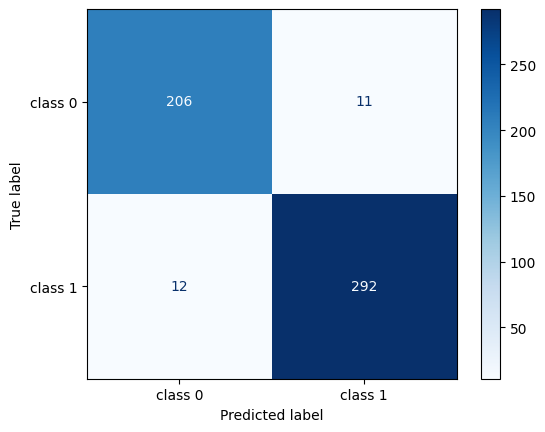

In [47]:
#performance results
print(classification_report(y_test, y_predbrlo, target_names=target_names))

cm = confusion_matrix(y_test, y_predbrlo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [48]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predbrlo))

El coeficiente de correlacion de Matthews es de  0.9092425919038263


### RL con Optuna y RFE

In [49]:
start=perf_counter()
# Define la función objetivo
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform("C", 1e-2, 1000)

    # Crea el modelo con los hiperparámetros sugeridos
    rlo = LogisticRegression(penalty=penalty, C=C, solver='saga',random_state=42)

    # Entrena el modelo
    rlo.fit(X_train_rfe,y_train)

    # Predice en el conjunto de prueba
    y_predrlorfe = rlo.predict(X_test_rfe)

    # Calcula la métrica de rendimiento (recall)
    lloss = log_loss(y_test, y_predrlorfe)

    return lloss


Mejores hiperparámetros: {'penalty': 'l2', 'C': 0.14500525895761893}
Elapsed time: 0.09 min.
              precision    recall  f1-score   support

     class 0       0.96      0.95      0.96       217
     class 1       0.97      0.97      0.97       304

    accuracy                           0.96       521
   macro avg       0.96      0.96      0.96       521
weighted avg       0.96      0.96      0.96       521



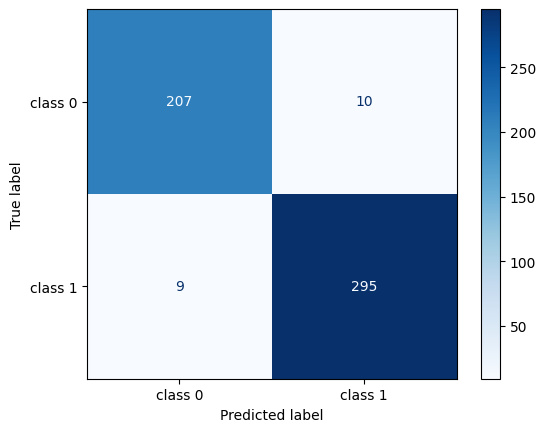

In [50]:
# Crea el estudio de optimización
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(objective, n_trials=300)

# Obtiene los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrena el modelo con los mejores hiperparámetros encontrados
best_modelrlo = LogisticRegression(**best_params, solver='saga',)
best_modelrlo.fit(X_train_rfe, y_train)

# Predice en el conjunto de prueba

y_predbrlorfe = best_modelrlo.predict(X_test_rfe)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

#performance results
print(classification_report(y_test, y_predbrlorfe, target_names=target_names))

cm = confusion_matrix(y_test, y_predbrlorfe)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [51]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predbrlorfe))

El coeficiente de correlacion de Matthews es de  0.9249289117963805


## Decision Tree

### Sin Feature Importances

In [52]:
start=perf_counter()

# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(random_state=42)
dt.fit(df_X_train_stand, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 0.00 min.


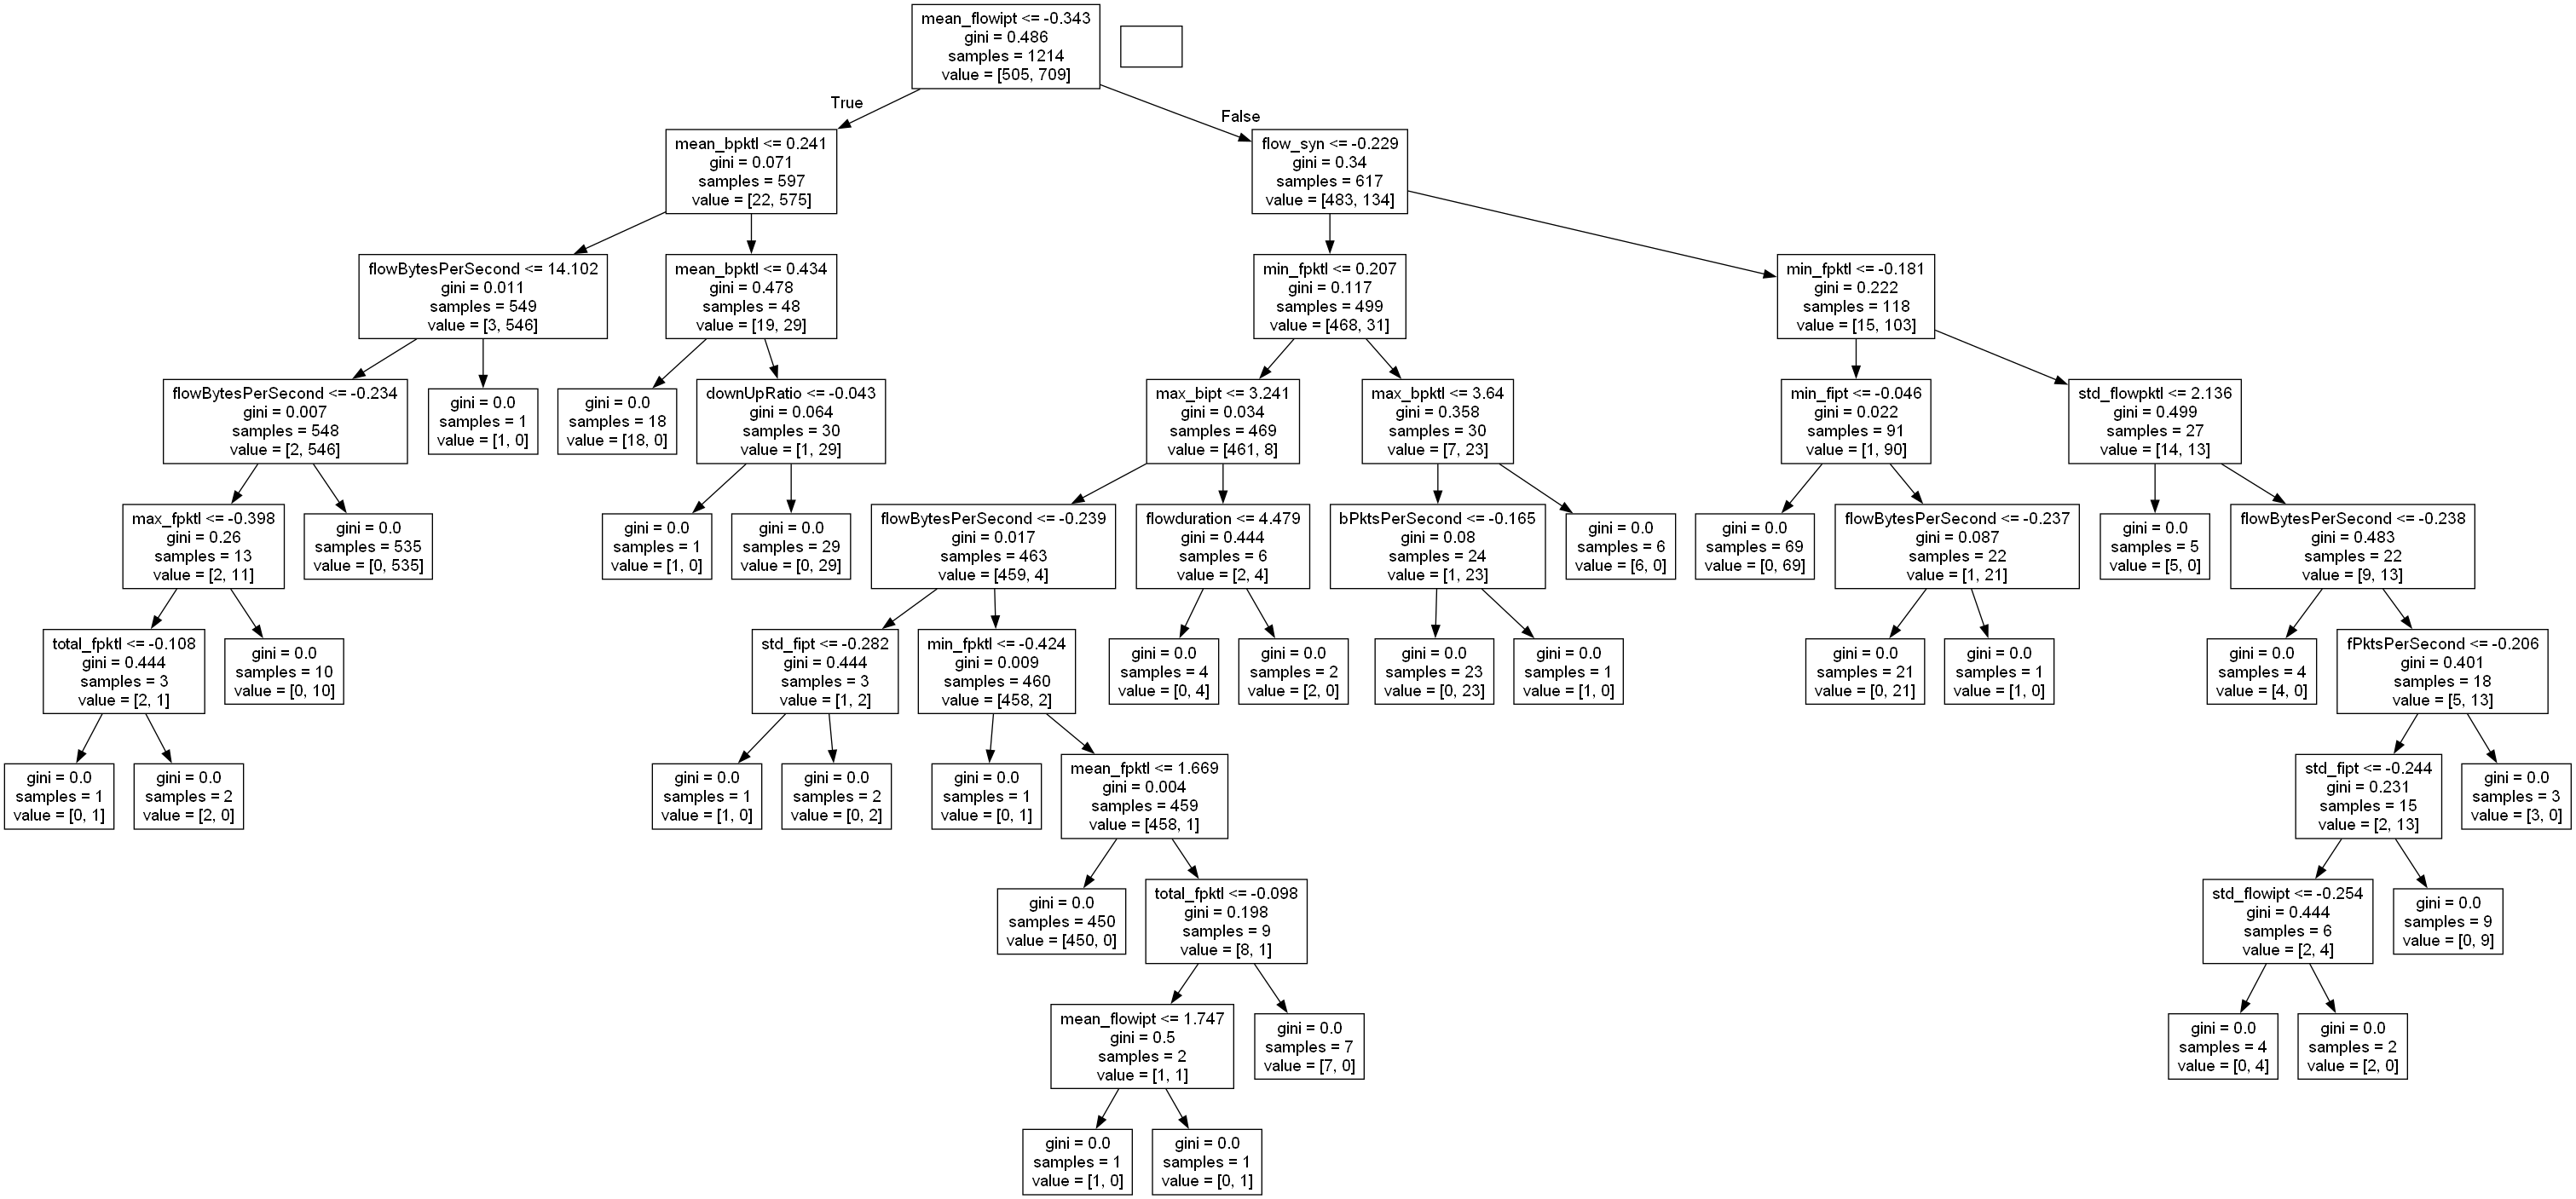

In [53]:
# Conjunto de variables predictoras
X = df.copy()
X.drop(['label'],axis=1,inplace=True)

features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [54]:
# Testing model
y_preddt = dt.predict(df_X_test_stand)
y_probdt = dt.predict_proba(df_X_test_stand)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddt, y_test))

Accuracy of Decision Tree-Test:  0.963531669865643


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       217
           1       0.96      0.97      0.97       304

    accuracy                           0.96       521
   macro avg       0.96      0.96      0.96       521
weighted avg       0.96      0.96      0.96       521



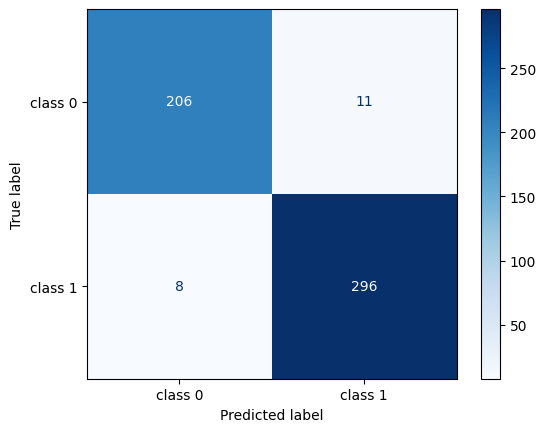

In [55]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_preddt))
ConfusionMatrixDisplay.from_predictions(y_test, y_preddt, display_labels=target_names, cmap=plt.cm.Blues)

In [56]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_preddt))

El coeficiente de correlacion de Matthews es de  0.924887640265864


### Con Feature Importances

Calculamos la `feature_iportances_` obtenida con el modelo anterior

In [57]:
feature_importances = dt.feature_importances_
feature_importances = pd.DataFrame([feature_importances], columns=X_test.columns[:])


Creamos un duplicado de nuestros conjuntos de entrenamiento y testing

In [58]:
feature_importances


flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0      0.004521             0.0             0.0     0.003579          0.0   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0   0.075275        0.0   0.003478   0.014947    0.000369    0.058451   

   std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  max_fipt  \
0        0.0        0.0         0.0         0.0  0.000117       0.0       0.0   

   max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  bpsh_cnt  \
0  0.008696        0.0        0.0  0.003617       0.0       0.0       0.0   

   total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0          0.0          0.0        0.006367        0.003249   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  \
0            0.017836            0.0      0.004823       0.57418     0.004521   

   flow_fin  flow_syn  flow_rst  flow_ack  flow_cwr  downUpRatio  
0       0.0  0.212696       0.0       0.0       0.0     0.003278

Ordenamos por importancia

In [59]:
feature_importances_transposed = feature_importances.transpose()

# Renombrar la columna
feature_importances_transposed.columns = ['importance']

# Ordenar las características de mayor a menor importancia
sorted_features = feature_importances_transposed.sort_values(by='importance', ascending=False)

sorted_features=sorted_features.transpose()
sorted_features

mean_flowipt  flow_syn  min_fpktl  mean_bpktl  flowBytesPerSecond  \
importance       0.57418  0.212696   0.075275    0.058451            0.017836   

            max_bpktl  max_bipt  fPktsPerSecond  std_flowpktl  flowduration  \
importance   0.014947  0.008696        0.006367      0.004823      0.004521   

            std_flowipt  std_fipt  total_fpktl  max_fpktl  downUpRatio  \
importance     0.004521  0.003617     0.003579   0.003478     0.003278   

            bPktsPerSecond  mean_fpktl  min_fipt  flow_cwr  flow_ack  \
importance        0.003249    0.000369  0.000117       0.0       0.0   

            flow_rst  total_bpackets  flow_fin  total_bpktl  min_bpktl  \
importance       0.0             0.0       0.0          0.0        0.0   

            mean_flowpktl  std_fpktl  std_bpktl  min_bipt  total_bhlen  \
importance            0.0        0.0        0.0       0.0          0.0   

            total_fhlen  bpsh_cnt  fpsh_cnt  std_bipt  total_fipt  \
importance          0.0       0.0       0.0       0.0         0.0   

            total_fpackets  mean_fipt  total_bipt  max_fipt  mean_bipt  
importance             0.0        0.0         0.0       0.0        0.0

Aplicamos el siguiente ciclo for para eliminar las columnas con una importancia de 0

In [60]:
Xfitrain = pd.DataFrame()
Xfitest  = pd.DataFrame()
fidt     = pd.DataFrame()

ncol=feature_importances.shape[1]

for i in range(0, ncol):
    if(feature_importances.at[0,feature_importances.columns[i]]>0):
        Xfitrain[feature_importances.columns[i]]= df_X_train_stand[feature_importances.columns[i]]
        Xfitest[feature_importances.columns[i]]= df_X_test_stand[feature_importances.columns[i]]
        fidt[feature_importances.columns[i]] = feature_importances[feature_importances.columns[i]]

print(feature_importances.shape)
fidt

(1, 40)


flowduration  total_fpktl  min_fpktl  max_fpktl  max_bpktl  mean_fpktl  \
0      0.004521     0.003579   0.075275   0.003478   0.014947    0.000369   

   mean_bpktl  min_fipt  max_bipt  std_fipt  fPktsPerSecond  bPktsPerSecond  \
0    0.058451  0.000117  0.008696  0.003617        0.006367        0.003249   

   flowBytesPerSecond  std_flowpktl  mean_flowipt  std_flowipt  flow_syn  \
0            0.017836      0.004823       0.57418     0.004521  0.212696   

   downUpRatio  
0     0.003278

#### VIF Feature Importance

A las features clasificadas con el metodo `feature_iportances_` le calculamos la multicolinealidad por medio de `VIF`

In [61]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Xfitrain.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(Xfitrain.values, i)
    for i in range(len(Xfitrain.columns))]

print(vif_data)

               feature         VIF
0         flowduration    5.430202
1          total_fpktl    2.741089
2            min_fpktl    3.752711
3            max_fpktl    9.875372
4            max_bpktl    8.396568
5           mean_fpktl    6.587032
6           mean_bpktl    4.973348
7             min_fipt    8.718121
8             max_bipt    2.771553
9             std_fipt   12.617591
10      fPktsPerSecond  210.329507
11      bPktsPerSecond  154.917073
12  flowBytesPerSecond   12.091409
13        std_flowpktl   11.150700
14        mean_flowipt   11.886505
15         std_flowipt   29.597942
16            flow_syn    1.828757
17         downUpRatio    1.041293


Observamos niveles altos de multicolinealidad, procedemos a eliminar de manera manual las features con niveles altos de VIF y bajos niveles de importancia

In [62]:
sorted_features

mean_flowipt  flow_syn  min_fpktl  mean_bpktl  flowBytesPerSecond  \
importance       0.57418  0.212696   0.075275    0.058451            0.017836   

            max_bpktl  max_bipt  fPktsPerSecond  std_flowpktl  flowduration  \
importance   0.014947  0.008696        0.006367      0.004823      0.004521   

            std_flowipt  std_fipt  total_fpktl  max_fpktl  downUpRatio  \
importance     0.004521  0.003617     0.003579   0.003478     0.003278   

            bPktsPerSecond  mean_fpktl  min_fipt  flow_cwr  flow_ack  \
importance        0.003249    0.000369  0.000117       0.0       0.0   

            flow_rst  total_bpackets  flow_fin  total_bpktl  min_bpktl  \
importance       0.0             0.0       0.0          0.0        0.0   

            mean_flowpktl  std_fpktl  std_bpktl  min_bipt  total_bhlen  \
importance            0.0        0.0        0.0       0.0          0.0   

            total_fhlen  bpsh_cnt  fpsh_cnt  std_bipt  total_fipt  \
importance          0.0       0.0       0.0       0.0         0.0   

            total_fpackets  mean_fipt  total_bipt  max_fipt  mean_bipt  
importance             0.0        0.0         0.0       0.0        0.0

In [63]:
X_fi_prueba=Xfitrain.drop(['min_fipt','fPktsPerSecond','bPktsPerSecond','std_flowpktl','std_flowipt','max_fpktl'], axis=1) 

In [64]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_fi_prueba.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(X_fi_prueba.values, i)
    for i in range(len(X_fi_prueba.columns))]

print(vif_data)

               feature       VIF
0         flowduration  3.507121
1          total_fpktl  1.552558
2            min_fpktl  3.189502
3            max_bpktl  3.163484
4           mean_fpktl  4.938694
5           mean_bpktl  4.498842
6             max_bipt  2.408589
7             std_fipt  2.194611
8   flowBytesPerSecond  1.105016
9         mean_flowipt  2.679457
10            flow_syn  1.504403
11         downUpRatio  1.029821


Reduciendo asi los valores a niveles aceptables de multicolinealidad <5, aplicamos los cambios al conjunto de entrenamiento y testing

In [65]:
X_train_fi=Xfitrain.drop(['min_fipt','fPktsPerSecond','bPktsPerSecond','std_flowpktl','std_flowipt','max_fpktl'],axis=1) 
X_test_fi=Xfitest.drop(['min_fipt','fPktsPerSecond','bPktsPerSecond','std_flowpktl','std_flowipt','max_fpktl'],axis=1) 


In [66]:
print("Nuevas dimensiones conjunto train: ", X_train_fi.shape, "y test: ", X_test_fi.shape)

Nuevas dimensiones conjunto train:  (1214, 12) y test:  (521, 12)


In [67]:
X_train_fi.head()

flowduration  total_fpktl  min_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0      1.087551    -0.104787  -0.399690   2.251868    1.015491    3.432964   
1     -0.396034    -0.108095  -0.302635  -0.529131   -0.591153   -0.639050   
2     -0.396031    -0.108100   0.061319  -0.079486   -0.354350    0.212652   
3     -0.396043    -0.108139  -0.302635  -0.574474   -0.702205   -0.681813   
4     -0.387418    -0.108096  -0.205581  -0.574474   -0.597685   -0.681813   

   max_bipt  std_fipt  flowBytesPerSecond  mean_flowipt  flow_syn  downUpRatio  
0  2.688903  1.168466           -0.239345      2.283018 -0.747294    -0.088380  
1 -0.261319 -0.283653           -0.032714     -0.347802  1.323974    -0.147498  
2 -0.261296 -0.283971            0.029153     -0.347559 -0.747294     0.161614  
3 -0.261359 -0.283971            7.579083     -0.348160  0.288340    -0.061475  
4 -0.215489 -0.274748           -0.239177     -0.176704  2.359608    -0.098069

Con esto, volvemos a entrenar el modelo DecisionTree

In [68]:
start=perf_counter()


dtfi = DecisionTreeClassifier(random_state=42)
dtfi.fit(X_train_fi, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 0.00 min.


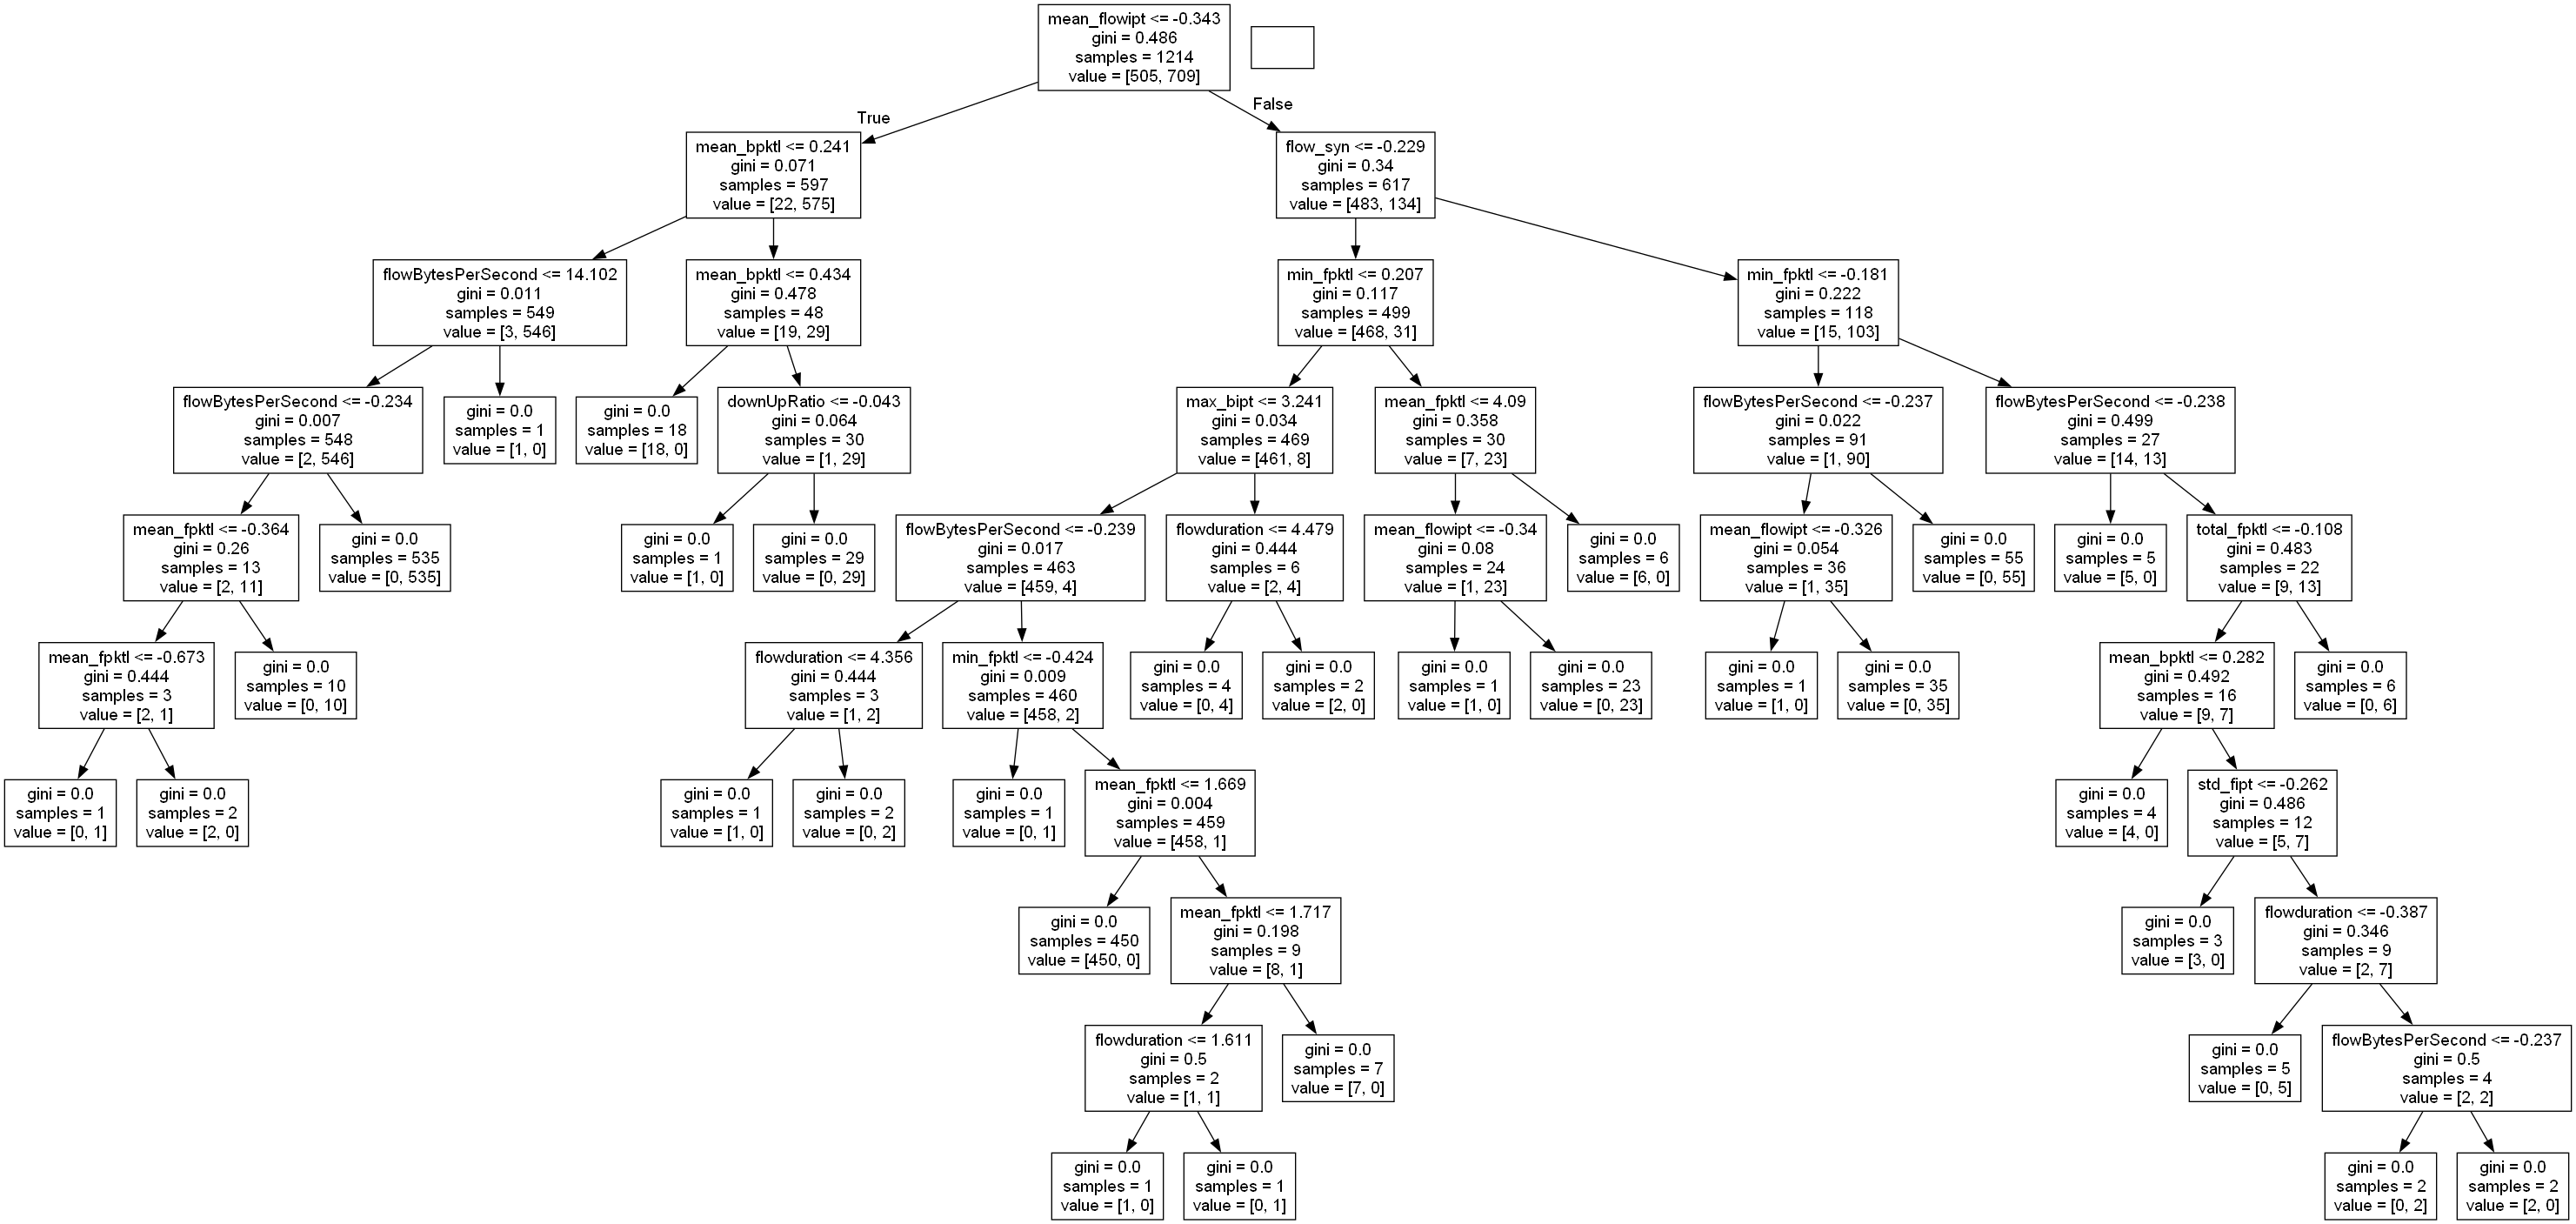

In [69]:
features = X_train_fi.columns
dot_data = export_graphviz(dtfi, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [70]:
# Testing model
y_preddtfi = dtfi.predict(X_test_fi)
y_probdtfi = dtfi.predict_proba(X_test_fi)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddtfi, y_test))

Accuracy of Decision Tree-Test:  0.9673704414587332


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       217
           1       0.97      0.98      0.97       304

    accuracy                           0.97       521
   macro avg       0.97      0.97      0.97       521
weighted avg       0.97      0.97      0.97       521



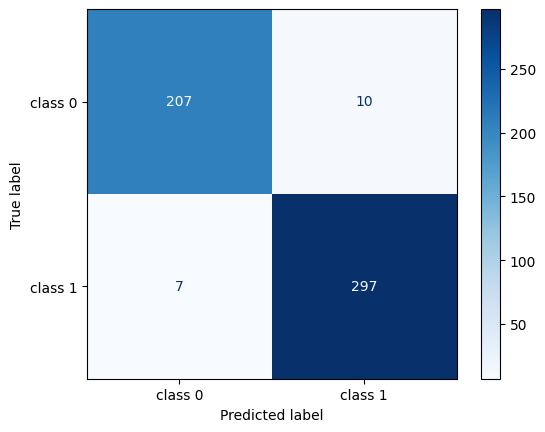

In [71]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_preddtfi))
ConfusionMatrixDisplay.from_predictions(y_test, y_preddtfi, display_labels=target_names, cmap=plt.cm.Blues)

In [72]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_preddtfi))

El coeficiente de correlacion de Matthews es de  0.9328016210269091


Con la seleccion de features aumentamos la Accuracy del modelo de **0.9635** a **0.9673**, procedemos a implementar tecnicas de optimizacion de hiperparametros buscando hacer el modelo mas eficiente

### DT optimization 

Los hiperparametros que se pueden ajustar en los Arboles de Decision son los siguientes
- min_samples_split – Minimum number of samples a node must possess before splitting.
- min_samples_leaf – Minimum number of samples a leaf node must possess.
- min_weight_fraction_leaf – Minimum fraction of the sum total of weights required to be at a leaf node.
- max_leaf_nodes – Maximum number of leaf nodes a decision tree can have.
- max_features – Maximum number of features that are taken into the account for splitting each node.


In [73]:
# Hyperparameter Tuning of DTC
start=perf_counter()

dtop = DecisionTreeClassifier(class_weight='balanced',random_state=42)

params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth' : ['None',2,3,4,5],
          'min_samples_split': [2,3,4,5],
          'min_samples_leaf': [1,2,3,4,5]}

gsearchdtop = GridSearchCV(dtop, param_grid=params, n_jobs=-1, cv=5)

gsearchdtop.fit(X_train_fi, y_train)

print("Best Parameters:", gsearchdtop.best_params_)

mdtop = DecisionTreeClassifier(criterion=gsearchdtop.best_params_['criterion'], max_depth=gsearchdtop.best_params_['max_depth'], min_samples_split=gsearchdtop.best_params_['min_samples_split'], min_samples_leaf=gsearchdtop.best_params_['min_samples_leaf'], 
                           class_weight='balanced',random_state=42)
mdtop.fit(X_train_fi, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Predecir y evaluar el modelo
predmdtop = mdtop.predict(X_test_fi)
accuracy = accuracy_score(y_test, predmdtop)
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Elapsed time: 0.02 min.
Accuracy: 0.9750479846449136


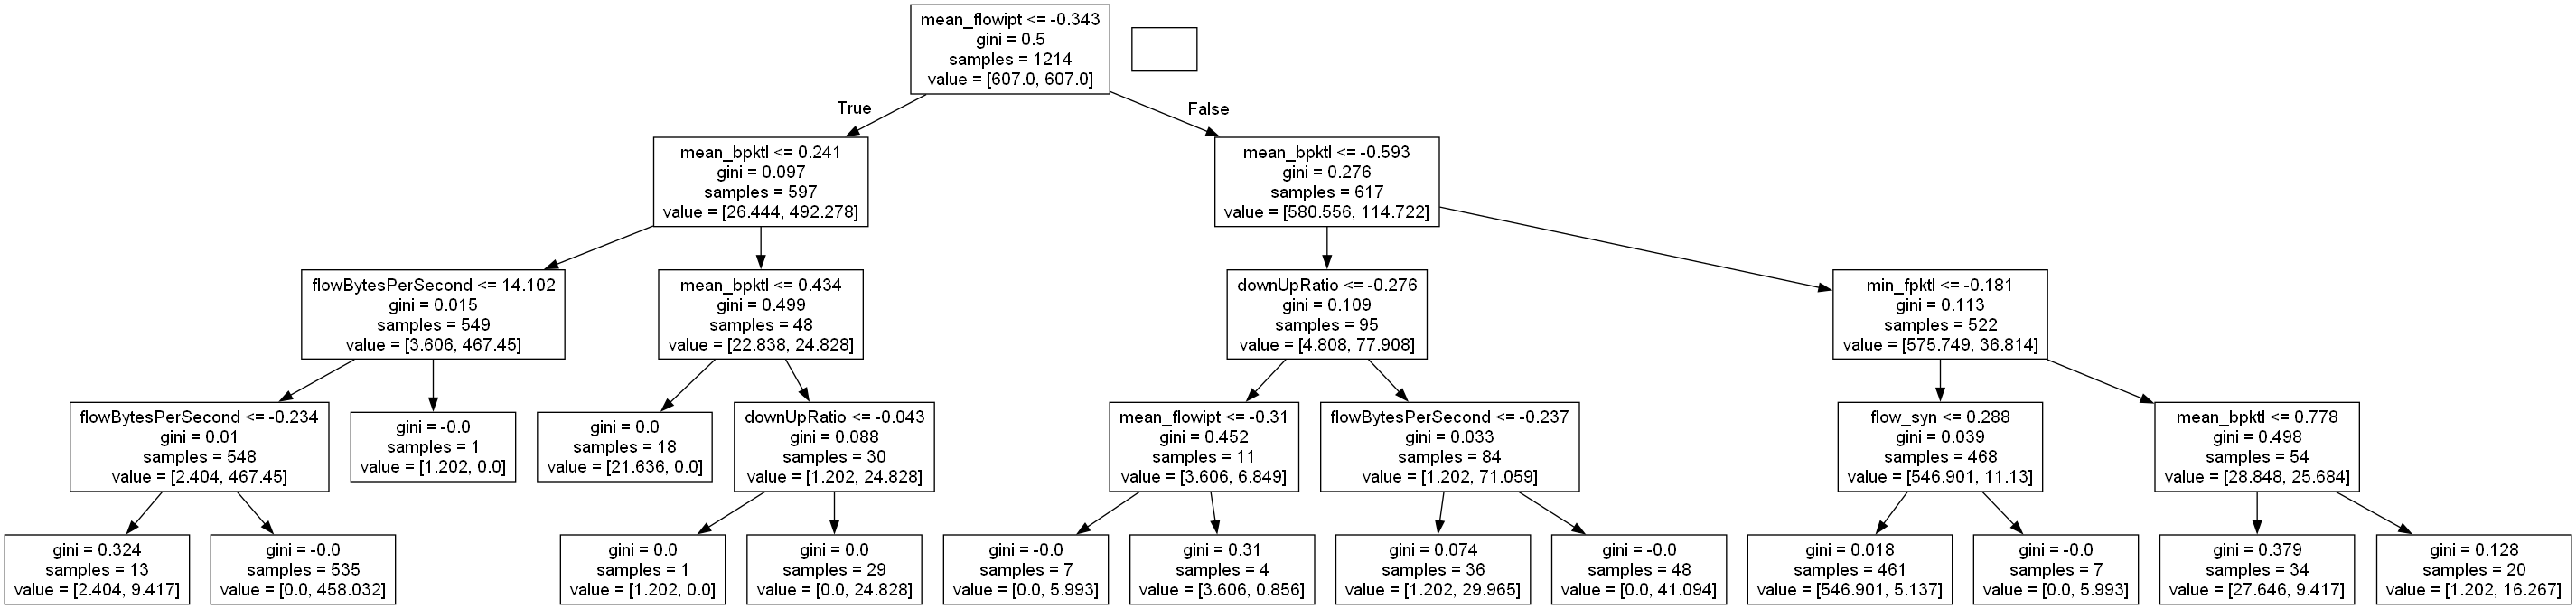

In [74]:
features = X_train_fi.columns
dot_data = export_graphviz(mdtop, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       217
           1       0.98      0.97      0.98       304

    accuracy                           0.98       521
   macro avg       0.97      0.98      0.97       521
weighted avg       0.98      0.98      0.98       521



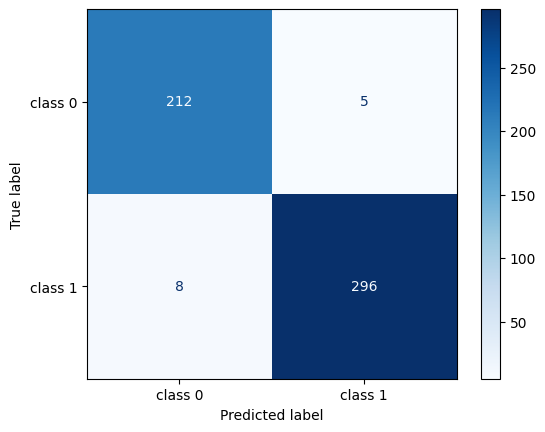

In [75]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,predmdtop))
ConfusionMatrixDisplay.from_predictions(y_test, predmdtop, display_labels=target_names, cmap=plt.cm.Blues)

In [76]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, predmdtop))

El coeficiente de correlacion de Matthews es de  0.9488321777534395


## XGBoost

### XGBoost con RFE

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Elapsed time: 1.67 min.
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=166, n_jobs=None,
              num_parallel_tree=None, objective='binary:hinge', ...)
Score: 0.9818862020882223
Classification Report:
               precision    recall  f1-score   support

           0       0.95     

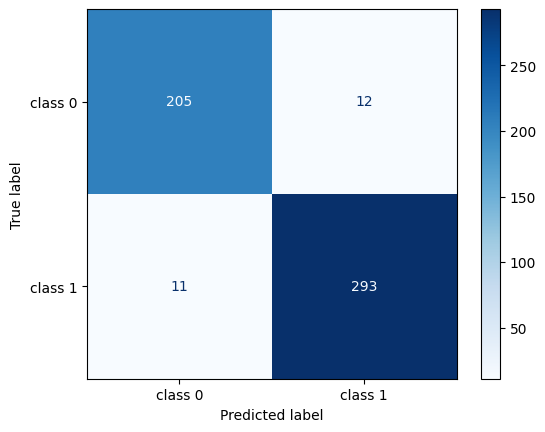

In [77]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
selectxg = XGBClassifier()

# Inicializar el selector RFE

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'objective':["binary:logistic","binary:logitraw","binary:hinge"],
    'n_estimators': np.logspace(2, 3, 10).astype(int),
    'max_depth': np.arange(2,10),
    'learning_rate': np.linspace(0.01, 1, 7)
   }

# Inicializar Randomized Search con Cross Validation
grid_xgbrfe = GridSearchCV(selectxg, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
grid_xgbrfe.fit(X_train_rfe, y_train)

# Obtener el mejor modelo
best_xgbmodelrfe = grid_xgbrfe.best_estimator_


tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


# Predecir y evaluar el modelo
predictionsxgbrfe = grid_xgbrfe.predict(X_test_rfe)
print("Best Parameters:", grid_xgbrfe.best_estimator_)
print("Score:", grid_xgbrfe.best_score_)
print("Classification Report:\n", classification_report(y_test, predictionsxgbrfe))
ConfusionMatrixDisplay.from_predictions(y_test, predictionsxgbrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [78]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, predictionsxgbrfe))

El coeficiente de correlacion de Matthews es de  0.909122828547642


### XGB con FI

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Elapsed time: 2.26 min.
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8350000000000001,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=129, n_jobs=None,
              num_parallel_tree=None, objective='binary:hinge', ...)
Score: 0.9802401115532428
Classification Report:
               precision    recall  f1-score   support

           0  

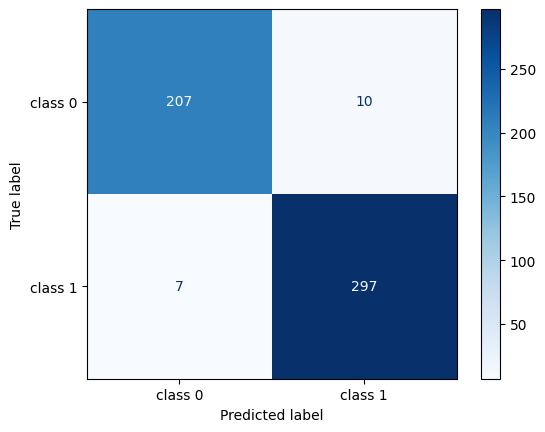

In [79]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
selectxg = XGBClassifier()

# Inicializar el selector RFE

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'objective':['binary:logistic','binary:logitraw','binary:hinge'],
    'n_estimators': np.logspace(2, 3, 10).astype(int),
    'max_depth': np.arange(2,10),
    'learning_rate': np.linspace(0.01, 1, 7)
   }

# Inicializar Randomized Search con Cross Validation
grid_xgbfi = GridSearchCV(selectxg, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
grid_xgbfi.fit(X_train_fi, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


# Obtener el mejor modelo
best_xgbmodelfi = grid_xgbfi.best_estimator_


# Predecir y evaluar el modelo
predictionsxgbfi = grid_xgbfi.predict(X_test_fi)
accuracy = accuracy_score(y_test, predictionsxgbfi)
print("Best Parameters:", best_xgbmodelfi)
print("Score:", grid_xgbfi.best_score_)
print("Classification Report:\n", classification_report(y_test, predictionsxgbfi))
ConfusionMatrixDisplay.from_predictions(y_test, predictionsxgbfi, display_labels=target_names, cmap=plt.cm.Blues)

In [80]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, predictionsxgbfi))

El coeficiente de correlacion de Matthews es de  0.9328016210269091


## Random Forest

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Elapsed time: 0.52 min.
Mejor modelo accuracy score: 0.9674
Mejores parámetros:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 20}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       217
           1       0.96      0.98      0.97       304

    accuracy                           0.97       521
   macro avg       0.97      0.96      0.97       521
weighted avg       0.97      0.97      0.97       521



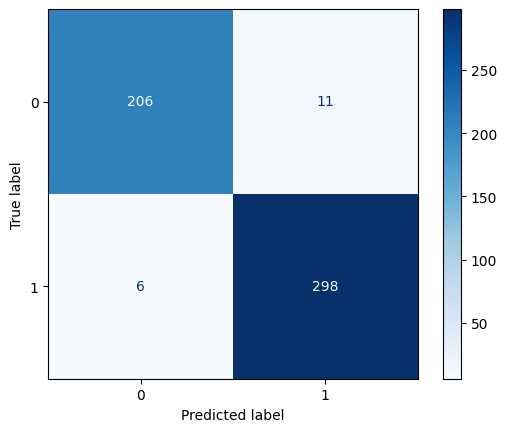

In [81]:

start=perf_counter()

# Define el modelo base a optimizar
clfrf = RandomForestClassifier(random_state=42)

# Define el espacio de búsqueda de parámetros
param_gridrf = {
    'n_estimators': np.linspace(20, 500, 7).astype(int),  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'max_depth' : [4,6,8,10],  # Máxima profundidad de cada árbol
    'criterion' :['gini', 'entropy']  # Medidas de calidad de la división
}

# Crear objeto GridSearchCV
grid_searchrf = GridSearchCV(estimator=clfrf, param_grid=param_gridrf, cv=5, verbose=3, n_jobs=-1)

# Entrenarlo
grid_searchrf.fit(X_train_fi, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Mejor modelo encontrado
best_clfrf = grid_searchrf.best_estimator_

# Predicciones con el mejor modelo
y_predrf = best_clfrf.predict(X_test_fi)

# Evaluar el mejor modelo
print('Mejor modelo accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predrf)))
print("Mejores parámetros: ", grid_searchrf.best_params_)

print("Classification Report:\n", classification_report(y_test, y_predrf))

# Print the Confusion Matrix and slice it into four pieces

ConfusionMatrixDisplay.from_predictions(y_test, y_predrf, cmap=plt.cm.Blues);

In [82]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predrf))

El coeficiente de correlacion de Matthews es de  0.9328299511661335


## Support Vector Machine

### Con Feature Selection de **RFE**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1000.0}
Elapsed time: 0.10 min.
Accuracy: 0.963531669865643
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       217
           1       0.97      0.96      0.97       304

    accuracy                           0.96       521
   macro avg       0.96      0.96      0.96       521
weighted avg       0.96      0.96      0.96       521



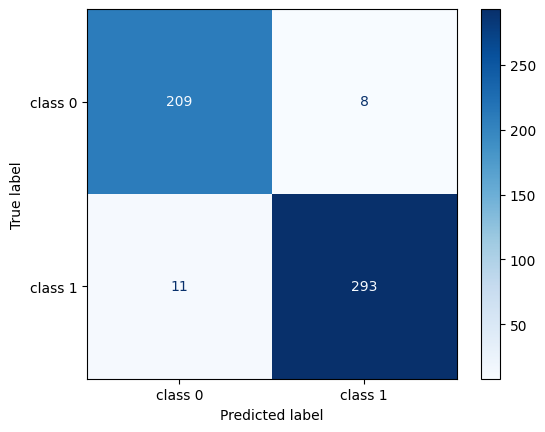

In [83]:
start=perf_counter()

svm = SVC()
# Definir los parámetros para la búsqueda de malla
param_grid = {
    'C': np.logspace(-3, 3, 4),
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
# Realizar la búsqueda de malla con validación cruzada
grid_searchsvmrfe = RandomizedSearchCV(svm, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5, random_state=42)
grid_searchsvmrfe.fit(X_train_rfe, y_train)
# Imprimir los mejores parámetros encontrados
print("Best Parameters:", grid_searchsvmrfe.best_params_)
# Usar el mejor modelo encontrado para hacer predicciones
best_modelsvmrfe = grid_searchsvmrfe.best_estimator_

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predsvmrfe = best_modelsvmrfe.predict(X_test_rfe)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_predsvmrfe))
print("Classification Report:\n", classification_report(y_test, y_predsvmrfe))
ConfusionMatrixDisplay.from_predictions(y_test, y_predsvmrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [84]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predsvmrfe))

El coeficiente de correlacion de Matthews es de  0.9251839972803463


### Con Feature Selection **DT**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 1000.0}
Elapsed time: 0.00 min.
Accuracy: 0.9539347408829175
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       217
           1       0.96      0.96      0.96       304

    accuracy                           0.95       521
   macro avg       0.95      0.95      0.95       521
weighted avg       0.95      0.95      0.95       521



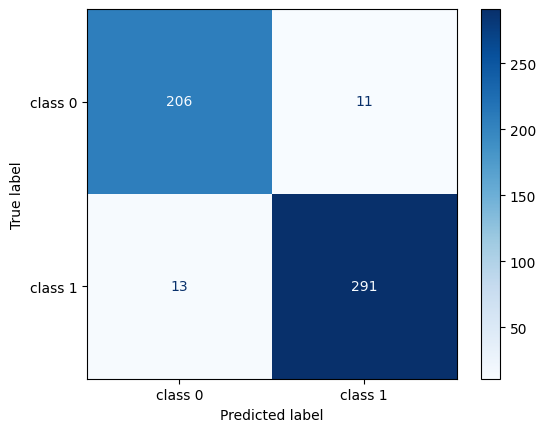

In [85]:
start=perf_counter()

svm = SVC()
# Definir los parámetros para la búsqueda de malla
param_grid = {
    'C': np.logspace(-3, 3, 3),
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
# Realizar la búsqueda de malla con validación cruzada
grid_searchsvmdt = RandomizedSearchCV(svm, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5, random_state=42)
grid_searchsvmdt.fit(X_train_fi, y_train)
# Imprimir los mejores parámetros encontrados
print("Best Parameters:", grid_searchsvmdt.best_params_)
# Usar el mejor modelo encontrado para hacer predicciones
best_modelsvmdt = grid_searchsvmdt.best_estimator_

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predsvmdt = best_modelsvmdt.predict(X_test_fi)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_predsvmdt))
print("Classification Report:\n", classification_report(y_test, y_predsvmdt))
ConfusionMatrixDisplay.from_predictions(y_test, y_predsvmdt, display_labels=target_names, cmap=plt.cm.Blues)


In [86]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predsvmdt))

El coeficiente de correlacion de Matthews es de  0.9053797634639118


## Ann

In [87]:
start=perf_counter()

# Extraemos el número de features
num_features = X_train_rfe.shape[1]

def build_model(trial):
    # Inicializa la lista de capas
    num_layers = trial.suggest_int('num_layers', 1, 5)
    units_per_layer = [trial.suggest_int(f'units_layer_{i}', 4, 256) for i in range(num_layers)]
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    
    # Determina el número de épocas y el tamaño del lote (batch size)
    num_epochs = trial.suggest_int('num_epochs', 5, 20)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    
    # Construye el modelo
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation='relu', kernel_initializer='random_normal', input_shape=(num_features,)))
    model.add(Dropout(dropout_rate))
    
    # Añade las capas ocultas
    for units in units_per_layer[1:]:
        model.add(Dense(units, activation='relu', kernel_initializer='random_normal'))
        model.add(Dropout(dropout_rate))
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))
    
    # Compila el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model, num_epochs, batch_size

def objective(trial):
    # Construye y compila el modelo
    modelrn, num_epochs, batch_size = build_model(trial)
    
    # Entrena el modelo
    modelrn.fit(X_train_rfe, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)
    
    # Evalúa el modelo
    score = modelrn.evaluate(X_test_rfe, y_test, verbose=0)
    
    return score[1]

# Crea un estudio de Optuna
studyrn = optuna.create_study(direction='maximize')
studyrn.optimize(objective, n_trials=100)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 3.93 min.


In [88]:
# Obtén el mejor modelo después de la optimización de Optuna
best_params = studyrn.best_params
best_params

{'num_layers': 3,
 'units_layer_0': 113,
 'units_layer_1': 62,
 'units_layer_2': 128,
 'dropout_rate': 0.18370665458216173,
 'num_epochs': 20,
 'batch_size': 16}

In [89]:
num_layers = best_params['num_layers']
units_per_layer = [best_params[f'units_layer_{i}'] for i in range(num_layers)]
dropout_rate = best_params['dropout_rate']
num_epochs = best_params['num_epochs']
batch_size = best_params['batch_size']

In [90]:
def build_modelfrn(num_layers, units_per_layer, dropout_rate):
    # Construye el modelo
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation='relu', input_shape=(num_features,)))
    model.add(Dropout(dropout_rate))
    
    # Añade las capas ocultas
    for units in units_per_layer[1:]:
        model.add(Dense(units, activation='relu',kernel_initializer='random_normal'))
        model.add(Dropout(dropout_rate))
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))
    
    # Compila el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [91]:
start=perf_counter()


best_modelfrn = build_modelfrn(num_layers, units_per_layer, dropout_rate)

# Entrena el mejor modelo utilizando todos los datos de entrenamiento
best_modelfrn.fit(X_train_rfe, y_train, epochs=num_epochs, batch_size=batch_size)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7626 - loss: 0.5348
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9631 - loss: 0.1625
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9680 - loss: 0.1088
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.9720 - loss: 0.1283
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9605 - loss: 0.1303
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.9601 - loss: 0.1175
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9722 - loss: 0.1047
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.9604 - loss: 0.1190
Epoch 9/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9640 - loss: 0.1273
Epoch 10/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.9654 - loss: 0.0991
Epoch 11/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9690 - loss: 0.0924
Epoch 12/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       217
           1       0.98      0.96      0.97       304

    accuracy                           0.97       521
   macro avg       0.97      0.97      0.97       521
weighted avg       0.97      0.97      0.97       521



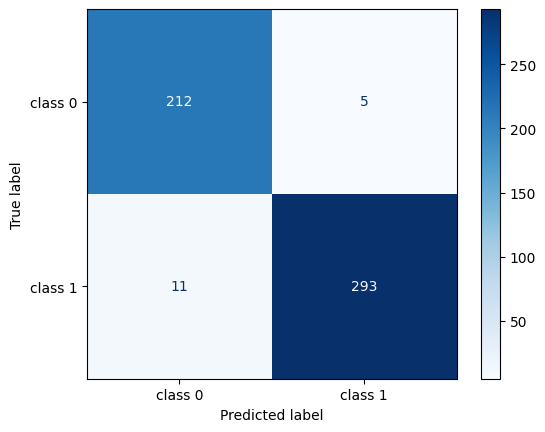

In [92]:
y_pred_proba = best_modelfrn.predict(X_test_rfe)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrn = (y_pred_proba > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(y_test, y_predfrn))
ConfusionMatrixDisplay.from_predictions(y_test, y_predfrn, display_labels=target_names, cmap=plt.cm.Blues)

In [93]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predfrn))

El coeficiente de correlacion de Matthews es de  0.9373279057904442
